In [1]:
import modules.pdfutil as pdfutil
import yaml

page    = pdfutil.page_from_file('../data/Saga/Unit_1_Mixed_Review.pdf', 2)
strings = pdfutil.strings_from_page(page)
print(yaml.dump(strings[0:15] + ['--snip--']))


- 'SAT '
- 'Unit '
- '1 '
- Assessment
- 'Student Version '
- 'Page '
- '3'
- 'of '
- '4'
- "\xA9 2019 Saga Education"
- SAT1.4 Model Equations and Word Problem Strategies
- '9.'
- (calculator)
- 'The cost of using a telephone in a hotel '
- 'meeting room is $0.20 per minute. Which of '
- --snip--



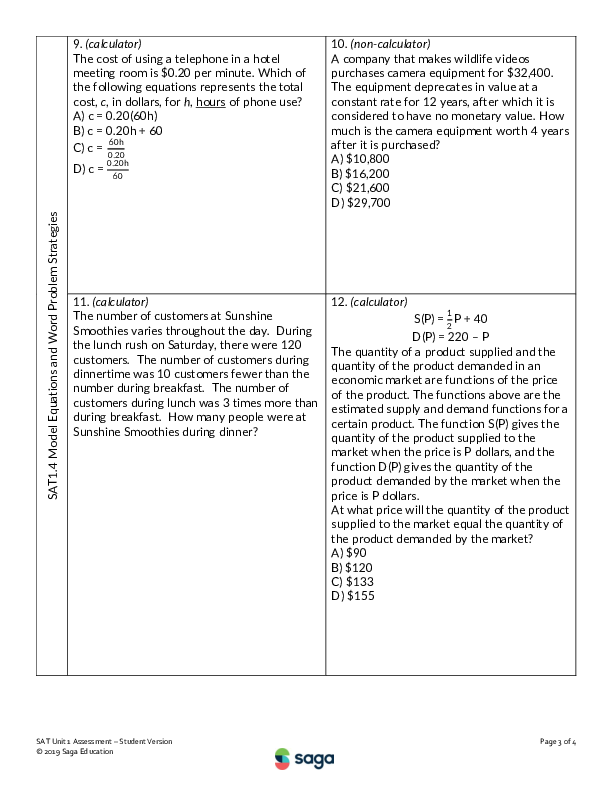

In [2]:
img = pdfutil.image_from_page(page)
img